# Loading Data..

In [10]:
import pandas as pd

speech = pd.read_csv('7.csv')
emotiono = pd.read_csv('emotion.csv')
gaze = pd.read_csv('gaze.csv')


# Analyzing the Speech Dataset


## Descriptive Statistics

The Three most Dominant emotions are:
positive:  0.72
confident:  0.70
enthusiastic:  0.46


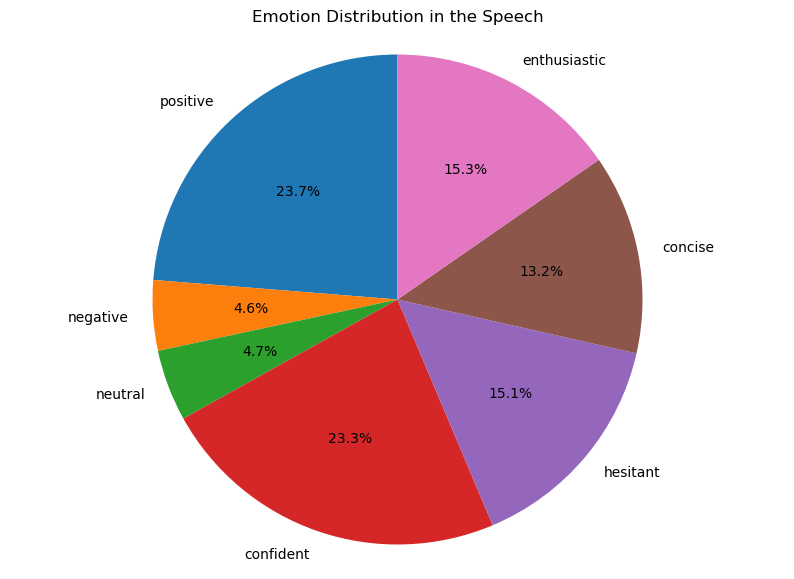

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

emotions = speech.columns[10:-1]
avg = speech[emotions].mean()

top3 = avg.sort_values(ascending = False).head(3)
print('The Three most Dominant emotions are:')
for emo , val in top3.items():
    print(f"{emo}: {val: .2f}")
    

plt.figure(figsize = (10 , 7))
plt.pie(avg , labels = avg.index , autopct ='%1.1f%%' , startangle = 90)
plt.title('Emotion Distribution in the Speech')
plt.axis('equal')
plt.show()

We can see the Three most dominant emotions depicted by the person.

## Trend Analysis

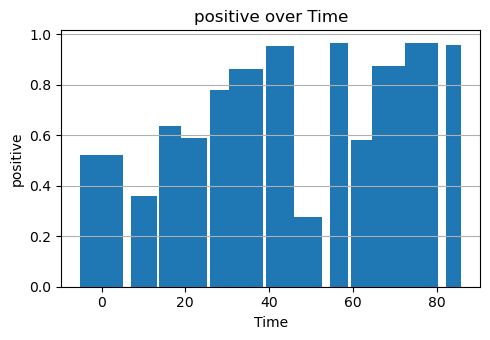

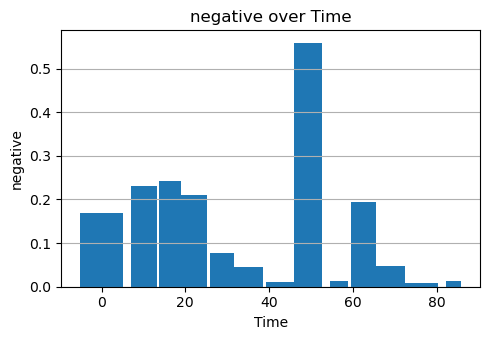

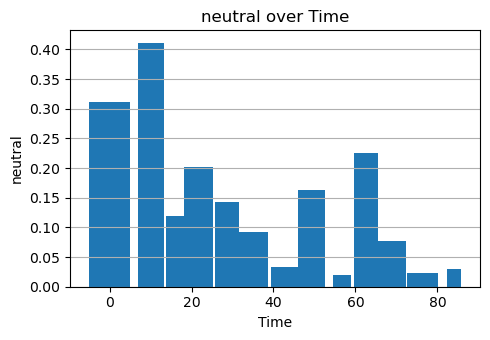

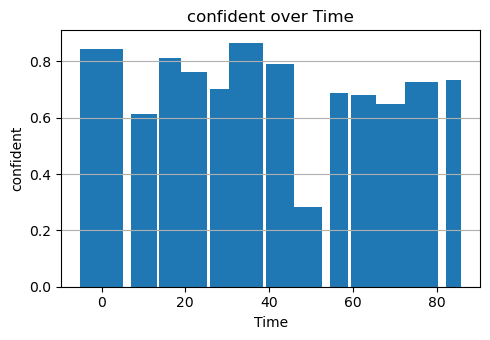

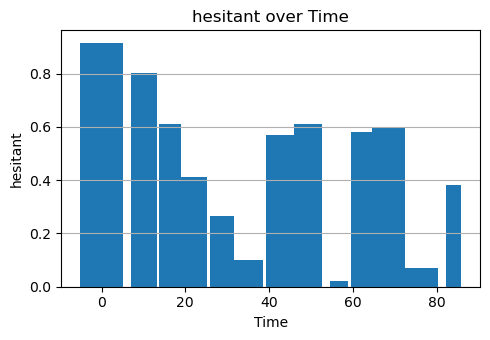

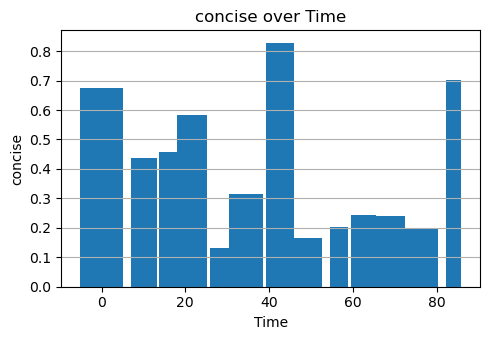

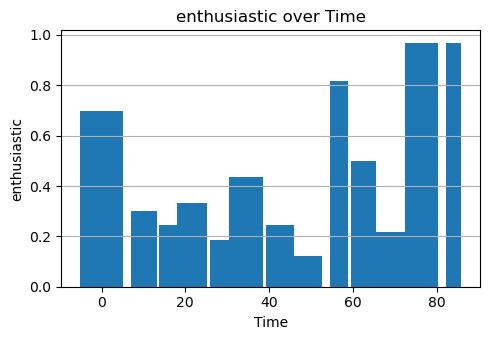

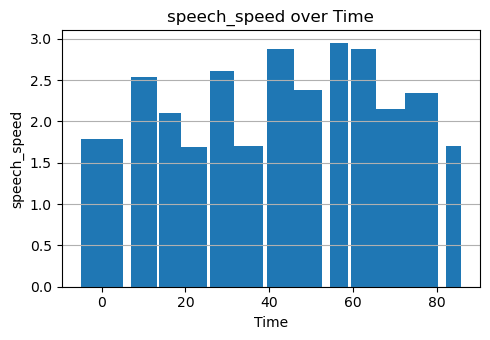

In [3]:

columns = speech.columns[10:]
for column in columns :
    plt.figure(figsize = (5 , 3.5))
    plt.bar(speech['start'] , speech[column] , width = (speech['end'] - speech['start']))
    
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()

INFERENCES BASED ON THE ABOVE GRAPHS:

1. An increased trend of postive tone is observed as the speech progresses with the exception when the person talks about his ideology that one cannot find newer oceans until he loses sight of the shore .

2. High values of confidence are observed throughout the speech .

3. As the speech progresses , it is observed that the generally , hesistance of the person decreases with time.

4. The person is usually concise throughout the speech except when he elaborates his interpersonal skills and what pushes him to do work.

5. The person also loses conciseness when talking about why he wants to work in I'mbesideyou.

6. Overall the person sounds less enthusiastic except when he talks about things that he likes about I'mbesideyou's ideology.


## Correlation Analysis

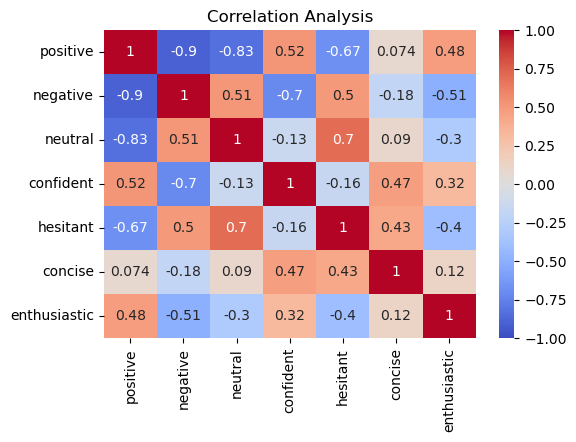

In [5]:
import seaborn as sns
selected = speech.columns[10:-1]
df = speech[selected]
corr = df.corr()

plt.figure(figsize = (6 , 4))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
plt.title("Correlation Analysis")
plt.show()

This heat map gives the correlation between emotions where strong correalations are generally (> 0.75 or < -0.75) and these strong correlations can be used to make inferences

# Analyzing the Emotion Dataset

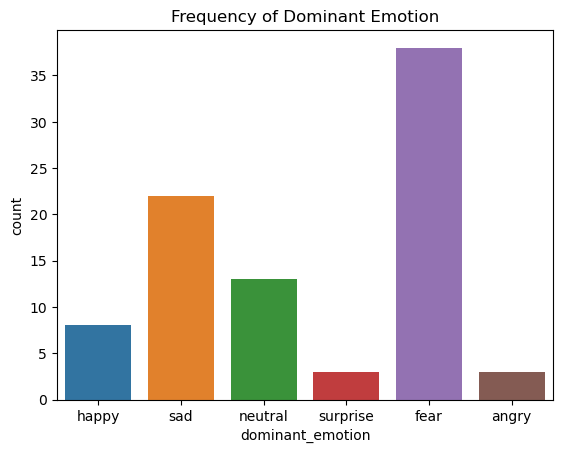

The most dominant emotion is 'fear' with a count of 38.


In [6]:
sns.countplot(data = emotiono , x = 'dominant_emotion')
plt.title('Frequency of Dominant Emotion')
plt.show()

emotion_counts = emotiono['dominant_emotion'].value_counts()
max_emotion = emotion_counts.idxmax()
max_count = emotion_counts.max()

print(f"The most dominant emotion is '{max_emotion}' with a count of {max_count}.")

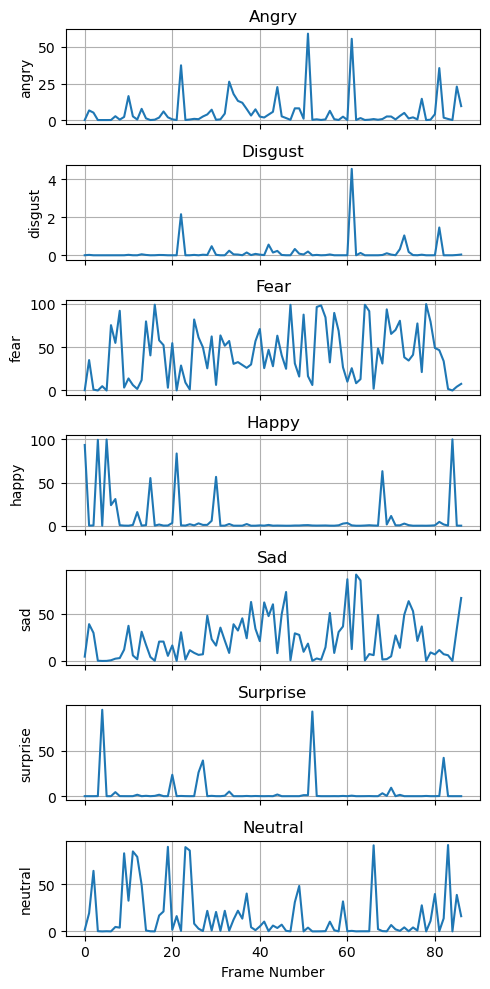

In [7]:
emotion_columns = emotiono.columns[2:-1]
fig, axes = plt.subplots(nrows=len(emotion_columns), figsize=(5 , 10), sharex=True)

x_range = list(range(0, len(emotiono)))

for ax, emotion_col in zip(axes, emotion_columns):
    ax.plot(x_range, emotiono[emotion_col], label=emotion_col)
    ax.set_ylabel(emotion_col)
    ax.grid(True)
    ax.set_title(emotion_col.capitalize())

plt.xlabel('Frame Number')
plt.tight_layout()
plt.show()

From the emotional graphs of the candidate's speech, patterns in 'neutral', 'fear', and 'sad' stood out. The neutral segments point to objective delivery. However, the spikes in 'fear' suggest moments of apprehension or recounting challenges, while 'sad' peaks may indicate past struggles or introspective moments. This combination paints a picture of a candidate who balances straightforward information with deeper personal reflections.

## Analyzing the Gaze Dataset


In [8]:
print(f"Percentage of frames with eye contact: {gaze['gaze'].mean() * 100:.2f}%")
print(f"Percentage of frames with blinks: {gaze['blink'].mean() * 100:.2f}%")

Percentage of frames with eye contact: 78.16%
Percentage of frames with blinks: 21.84%


Given that the speaker maintains eye contact in 78.16% of the frames, they exhibit a strong sense of confidence and a consistent connection with the audience. The blink rate of 21.84% suggests the speaker is actively processing information and experiencing natural emotional responses. While they remain largely engaged, the blink rate indicates a balance of focus and authenticity in their delivery.

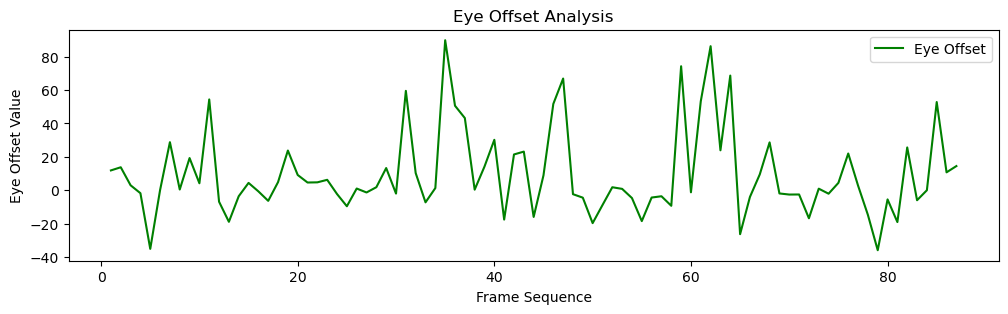

In [9]:
plt.figure(figsize=(12,3))
plt.plot(gaze['image_seq'], gaze['eye_offset'], label='Eye Offset', color='green')
plt.xlabel('Frame Sequence')
plt.ylabel('Eye Offset Value')
plt.title('Eye Offset Analysis')
plt.legend()
plt.show()

The overall fewer peaks in the eye_offset graph indicate that the candidate maintains a steady gaze most of the time, suggesting confidence, preparation, and focus. The limited deviations imply minimal reliance on external references or distractions, portraying a clear and composed presentation style

# Overall Summary

Person7's speech strengthens in positivity, especially when touching on challenges and new ventures. Confidence is a constant, while hesitancy diminishes over time. They're mainly concise but delve deeper when discussing their skills and affinity for I'mbesideyou. Their primary emotion, 'fear', hints at underlying apprehension. With 78.16% eye contact, they display confidence; however, a 21.84% blink rate adds genuine nuance. Their mostly steady gaze underlines a prepared and focused delivery